# Momentum

    1. The SPY is higher than X days ago, buy
    2. If the SPY is lower than X days ago, sell your long position.
    
    (optimize for number of days)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [12]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [13]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
#end = datetime.datetime(2010, 12, 1)
end = datetime.datetime.now()

Define lookback period

In [14]:
periods = range(3, 18+1)
periods = [str(period) for period in periods]

Run Strategy

In [15]:
strategies = pd.Series(dtype=object)
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, period=int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 

Summarize results

In [16]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
annual_return_rate,5.60,6.14,7.80,8.41,7.07,8.49,9.61,8.54,9.05,9.31,8.43,9.02,9.46,9.04,9.12,9.69
max_closed_out_drawdown,-26.94,-26.66,-24.34,-24.57,-29.65,-22.05,-26.17,-30.08,-25.51,-22.90,-32.57,-29.75,-33.27,-33.25,-33.25,-27.59
drawdown_annualized_return,-4.81,-4.34,-3.12,-2.92,-4.19,-2.60,-2.72,-3.52,-2.82,-2.46,-3.87,-3.30,-3.52,-3.68,-3.65,-2.85
drawdown_recovery,-4.45,-3.56,-3.04,-0.31,-2.89,-1.75,-1.10,-0.40,-1.10,-0.67,-0.23,-0.17,-0.11,-0.11,-0.11,-2.73
best_month,15.03,15.02,15.44,15.43,15.45,15.03,17.78,17.78,17.78,17.79,17.77,17.78,17.96,17.95,17.98,17.77
worst_month,-18.86,-18.88,-18.94,-18.91,-18.93,-18.91,-22.09,-22.07,-18.94,-18.94,-29.10,-29.07,-29.08,-29.06,-29.06,-18.93
sharpe_ratio,0.51,0.56,0.67,0.71,0.60,0.69,0.76,0.68,0.71,0.71,0.64,0.67,0.69,0.66,0.67,0.73
sortino_ratio,0.53,0.60,0.74,0.77,0.65,0.76,0.85,0.77,0.80,0.82,0.70,0.75,0.77,0.75,0.76,0.84
monthly_std,3.13,3.17,3.09,3.20,3.34,3.34,3.50,3.45,3.39,3.41,3.55,3.61,3.65,3.69,3.72,3.47
pct_time_in_market,70.81,71.71,73.13,74.71,76.53,77.49,78.54,78.75,79.59,81.30,80.54,81.63,81.73,82.20,81.74,81.42


Bar graphs

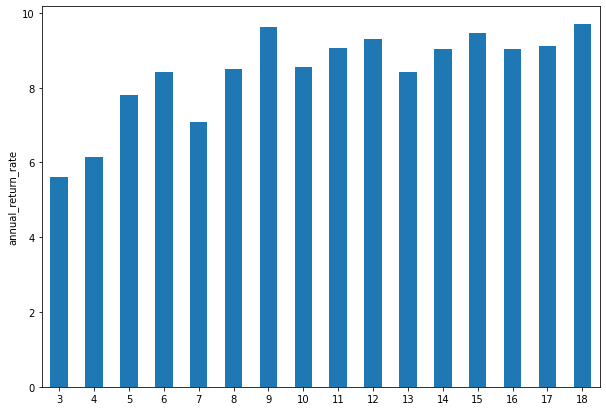

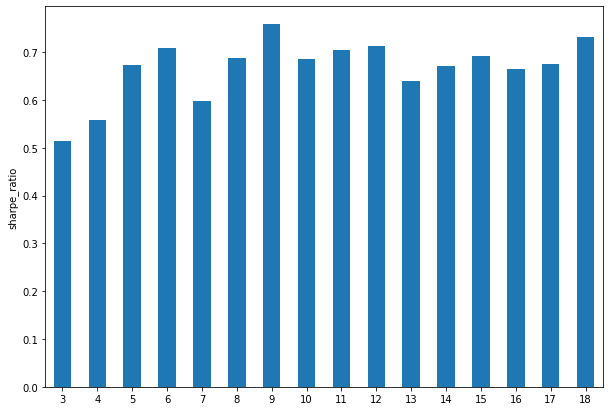

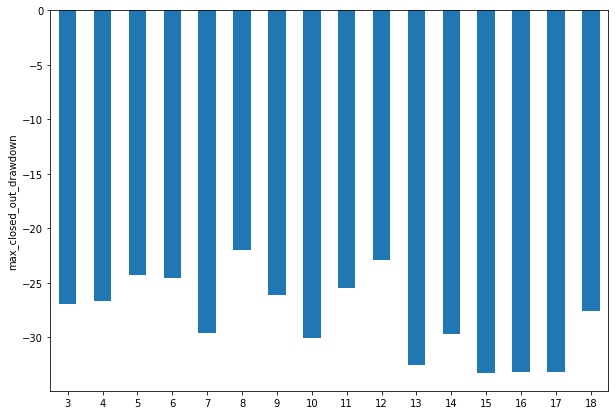

In [17]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [18]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1994-07-05 00:00:00 BUY  223 SPY @ 44.80
2020-07-23 00:00:00 SELL 223 SPY @ 322.28


Equity curve

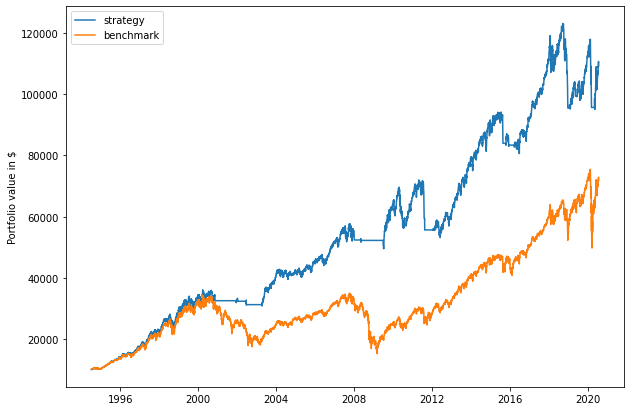

In [19]:
pf.plot_equity_curve(strategies['9'].dbal, benchmark=benchmark.dbal)